Домашнее задание по теме «Основныебиблиотеки: MatplotLib/Seaborn/Plotly»


Задача №1

In [167]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [168]:
# Функция y(x)
def y(x): 
    return np.cos(20 * x) / (x + 0.1)
# Генерируем массив
ax = np.arange(0, 4, 0.01)
ay = y(ax)

In [169]:
# Фукнция для вывода графика с помощью библиотеки Matplotlib
def plt_mpl():
    plt.figure(figsize=(5, 3))
    plt.plot(ax, ay)
    plt.title('График функции в Matplotlib')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [170]:
def plt_sns():
    plt.figure(figsize=(5, 3))
    sns.lineplot(x=ax, y=ay)
    plt.title('График функции в Seaborn')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


In [171]:
def plt_pll():
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=ax, y=ay, mode='lines'))
    fig.update_layout(title='График функции в Plotly',
                        xaxis_title='x',
                        yaxis_title='y',
                        margin=dict(l=0, r=20, t=50, b=50),
                        width=457,  
                        height=300)
    fig.show()

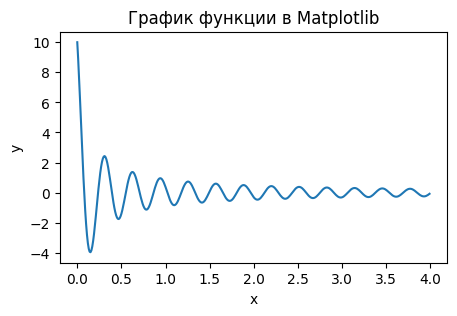

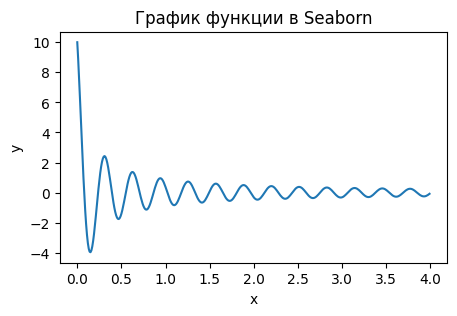

In [172]:
# Выводим графики
plt_mpl()
plt_sns()
plt_pll()

Задача №2

Задача №3

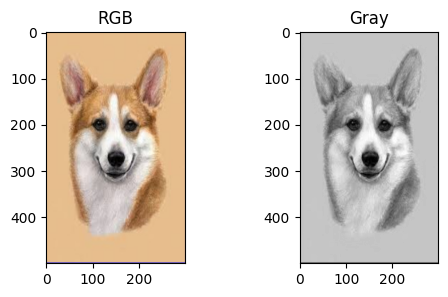

In [ ]:
# Дублирую импорт библиотек
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np
rgb_img = mpimg.imread('data/corg.jpg') # Загружаем рисунок
weights = [0.2989, 0.5870, 0.1140] # Веса для цветов
g_img = np.dot(rgb_img[..., :3], weights) # Преобразуем в серый (срезом выбираем матрицы "палитры" )
figure, (left,right) = plt.subplots(1,2,figsize=(6, 3)) # Делим график на две части в горизонте
left.imshow(rgb_img) # вывод рисунка RGB
left.set_title('RGB')
right.imshow(g_img, cmap='gray') # Вывод рисунка gray
right.set_title('Gray')
plt.show()